# Wstęp
Zatonięcie Titanica jest jednym z największych katastrof na wodzie.

15 Kwietnia 1912 statek zatonął po dobiciu do lodowca na pierwszym rejsie z Southampton do New York City. Na pokładzie było ok. 2224 pasażerów wraz z załogą z czego ponad 1500 zginęło, robiąc z tego zatonięcia jednen z najgorszych katastrof na wodzie.

Z przetrwaniem wiązał się z pewien element szczęścia, statystyki pokazują, że niektóre grupy ludzi miały większe szanse na przeżycie niż inne.

# Zbiór danych

In [35]:
data = read.table("Titanic.csv", header=TRUE, sep=",", fill=TRUE)
str(data)

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : Factor w/ 891 levels "Abbing, Mr. Anthony",..: 109 191 358 277 16 559 520 629 417 581 ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : Factor w/ 681 levels "110152","110413",..: 524 597 670 50 473 276 86 396 345 133 ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : Factor w/ 148 levels "","A10","A14",..: 1 83 1 57 1 1 131 1 1 1 ...
 $ Embarked   : Factor w/ 4 levels "","C","Q","S": 4 2 4 4 4 3 4 4 4 2 ...


Zbiór składa się z:

- ~~PassengerId~~ - Identyfikator pasażera  
- Survived – Czy pasażer przeżył? (0 - Nie | 1 – Tak)
- Pclass – Klasa biletu (1 – Pierwsza | 2 – Druga | 3 – Trzecia)
- ~~Name~~ - Nazwa pasażera
- Sex – Płeć
- Age – Wiek pasażera
- Sibsp – Liczba rodzeństwa lub małżonków na pokładzie statku
- Parch – Liczba rodziców lub dzieci na pokładzie statku
- ~~Ticket~~ - Identyfikator biletu
- ~~Fare~~ – Koszt przepływu
- ~~Cabin~~ – Numer kabiny
- ~~Embarked~~ – Port startowy (C - Cherbourg | Q - Queenstown | S - Southampton)

Przekreślone wartości nie były branę pod uwagę przy analizie

## Czyszcenie  danych
Do pasażerów z brakującym wiekem została wpisana wartość mediany dla kolumny wiek.

In [36]:
data$Age[which(is.na(data$Age))] <- median(data$Age,na.rm = TRUE)

# Wpływ wieku na przeżywalność

Na wykresie wiek został podzielony na grupy po 15 lat życia. Niektórzy pasażerowie w zbiorze nie posiadali wieku, dla nich została wprowadzaona wartość mediany, co wprowadza wiele niepewności do tej analizy.

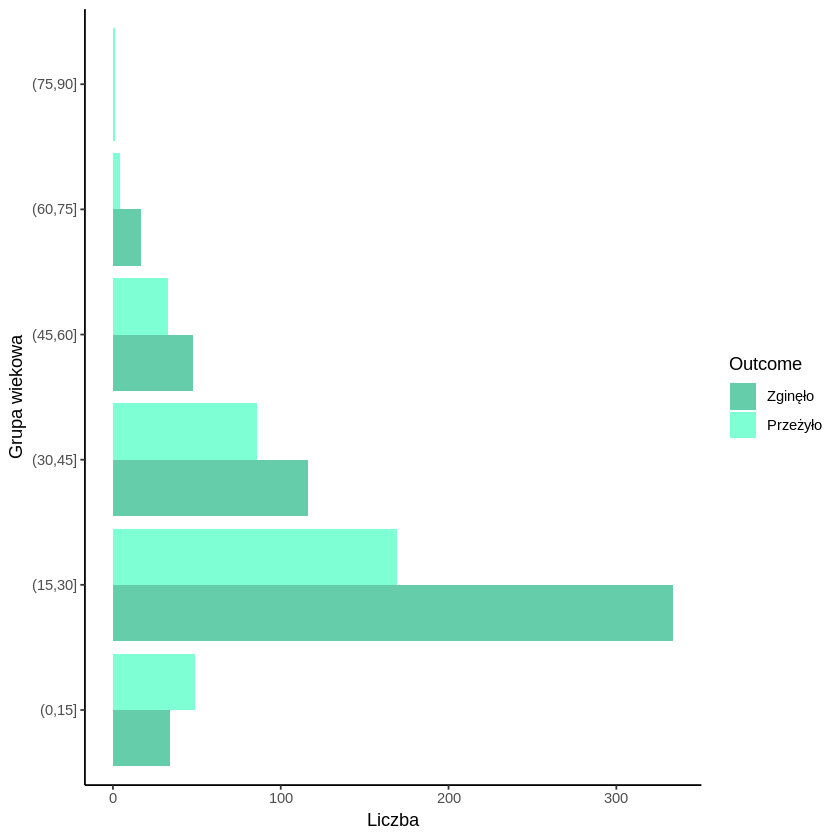

In [37]:
data$AgeGroup=cut(data$Age, breaks=c(0, 15, 30, 45, 60, 75, 90))
ggplot(
  data, 
  aes(x = factor(AgeGroup), 
  fill=factor(Survived))
  ) +
   geom_bar(position = 'dodge') +
   labs(x = 'Grupa wiekowa', y = 'Liczba') + 
   scale_fill_manual(
     values = c("aquamarine3", "aquamarine"),
     name = 'Outcome',
     labels = c('Zginęło', 'Przeżyło')
   ) + 
   theme_classic() +
   coord_flip()

Dzieci (w wieku 0-15 lat) były jedyną grupą, w której wskaźnik przeżycia przewyższał wskaźnik zgonów. Młodzież (15-18 lat) i młodzi dorośli (18-30 lat) mieli gorszy wskaźnik przeżycia niż osoby w średnim wieku (30-60 lat). Osoby starsze miały najgorszy wskaźnik przeżycia.


Ze względu na dużą ilość grup wiekowych zastosowano wykres słupkowy.

# Wpływ klasy na przeżywalność

Poniższy wykres pokazuje, jak klasa pasażerska wpłynęła na wskaźnik przeżywalności:

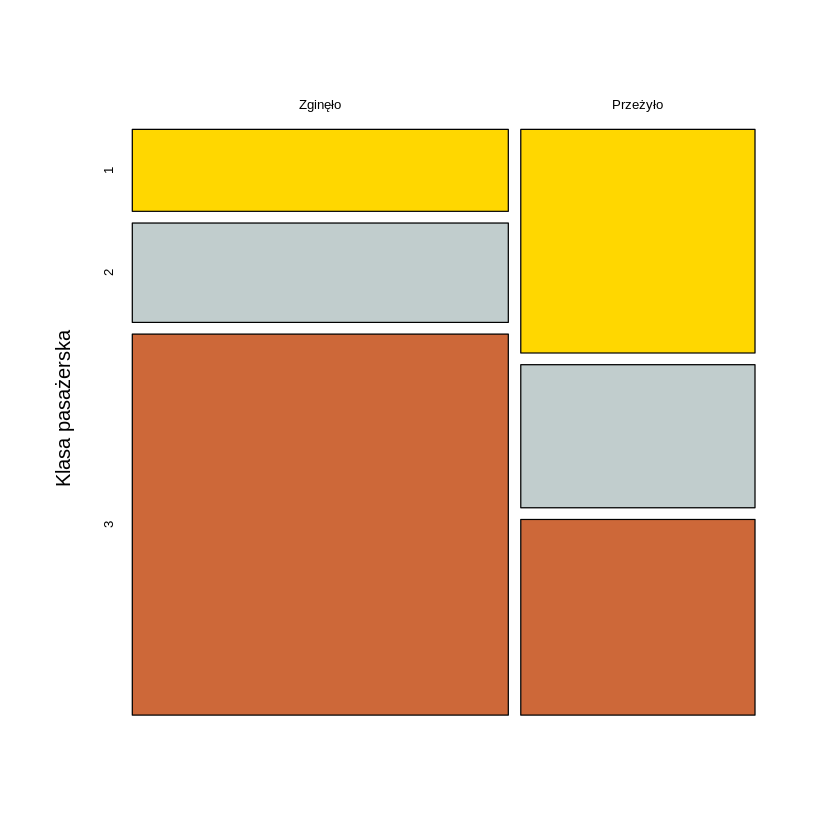

In [38]:
mosaicplot(
  ~ factor(data$Survived, labels = c("Zginęło", "Przeżyło")) +
  factor(data$Pclass),
  data = data, 
  main="",
  xlab = " ",
  ylab = "Klasa pasażerska",
  color = c("gold1", "azure3", "sienna3")
)

Nawet jeśli pierwsza i druga klasa stanowią mniejszą część pasażerów, ich wskaźnik przeżycia jest znacznie wyższy, przy czym pierwsza klasa jest dominująca. To pokazuje, że bogatsi pasażerowie byli w rzeczywistości traktowani lepiej niż biedniejsi.

Diagram Marimekko został użyty do zobrazowania, jak klasa pasażera wpłynęła na wskaźnik przeżycia. 

# Wpływ płeci na przeżywalność

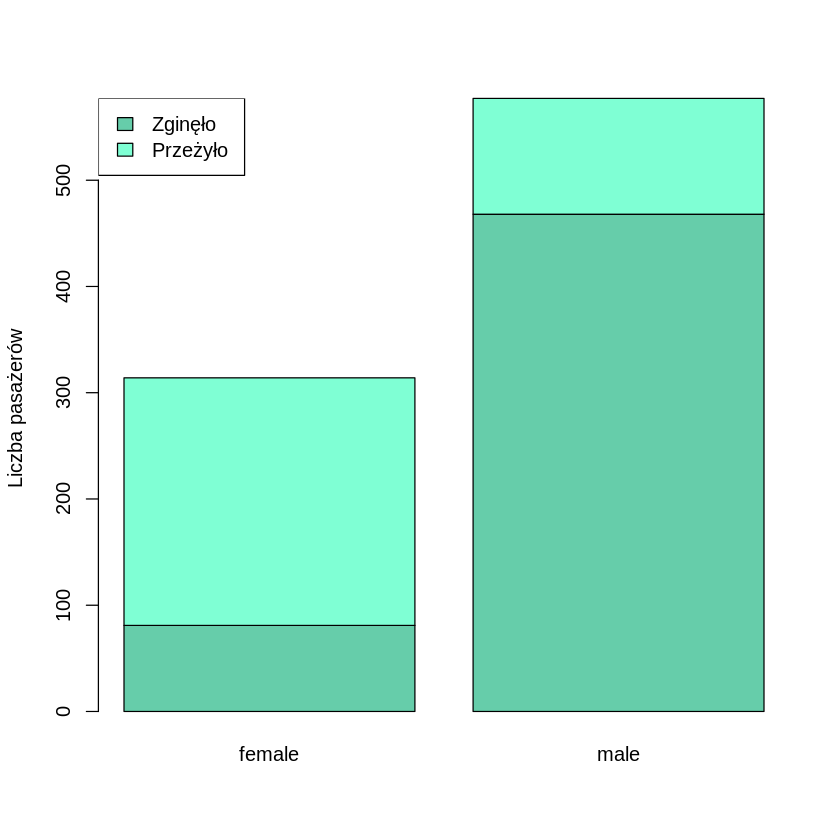

In [40]:
barplot(
  table(data$Survived, data$Sex),
  ylab="Liczba pasażerów", 
  col=c("aquamarine3","aquamarine")
)
legend(
  "topleft",
  legend = c("Zginęło", "Przeżyło"),
  fill=c("aquamarine3","aquamarine")
)

Kobiety stanowiły nieco ponad 1/3 wszystkich pasażerów, ale ich wskaźnik przeżycia był znacznie wyższy niż mężczyzn. Przeżyło ponad 2/3 kobiet, podczas gdy przeżyło tylko około 1/6 mężczyzn. Oznacza to, że życie kobiet było traktowane priorytetowo w działaniach ratunkowych.

Patrząc na wykres o wieku i o płeci można wywnioskować, że załoga stosowała kodeks postępowania "Kobiety i dzieci najpierw". Kodeks ten pochodzi z 1852 roku i mówi, że kobiety i dzieci powinny być ratowane w pierwszej kolejności w sytuacji zagrożenia życia, zazwyczaj przy opuszczaniu statku.

Użyto nałożony wykres słupkowy, aby pokazać łatwe dla oka porównanie między przeżyciem a śmiercią.

# Wpływ rozmiaru rodziny na przeżywalność 

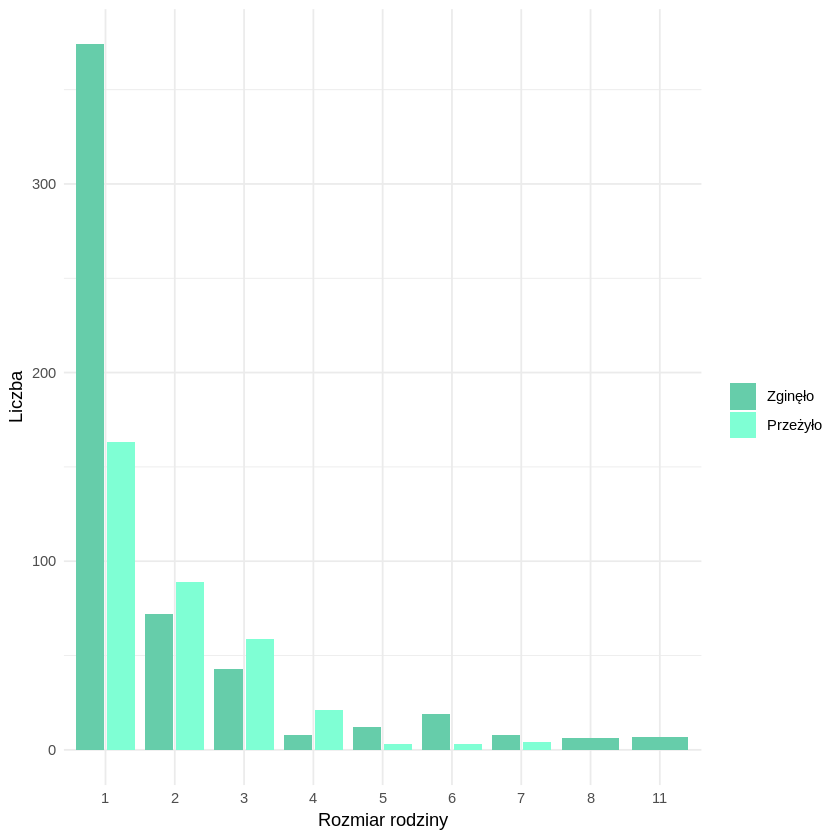

In [43]:
data$family = data$SibSp + data$Parch + 1

ggplot(data, aes(x = factor(family), fill=factor(Survived))) +
geom_bar(position = 'dodge2') +
labs(x = 'Rozmiar rodziny', y = 'Liczba') + scale_fill_manual(values = c("aquamarine3", "aquamarine"),
name = ' ', 
labels = c('Zginęło', 'Przeżyło')) + theme(legend.position = 'right') + theme_minimal()

Z wykresu można odczytać, że mniejsze rodziny (2-4) miały znacznie większe szanse na przeżycie niż samotni pasażerowie lub większe rodziny.

# Podsumowanie
Analiza była ciekawym eksperymentem, który obrazuje co mogło się dziać na statku Titanic. Przeżycie w katastrofie Titanica nie było oparte wyłącznie na szczęściu, wiele różnych czynników mogło odegrać istotną rolę w określeniu przeżywalności pasażerów.